In [41]:
import os

base_path = "data"

for condition in os.listdir(base_path):
    condition_path = os.path.join(base_path, condition)
    if not os.path.isdir(condition_path):
        continue

    for item_type in os.listdir(condition_path):
        item_path = os.path.join(condition_path, item_type)
        if not os.path.isdir(item_path):
            continue

        images = [f for f in os.listdir(item_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        print(f"Renaming {len(images)} images in {item_type}...")

        for i, img in enumerate(images, start=1):
            ext = os.path.splitext(img)[1].lower()
            new_name = f"{condition}_{item_type}_{i:03d}{ext}"
            old_path = os.path.join(item_path, img)
            new_path = os.path.join(item_path, new_name)
            try:
                os.rename(old_path, new_path)
            except Exception as e:
                print(f"Error renaming {img}: {e}")

print("Renaming completed successfully.")


Renaming 612 images in FreshApple...
Renaming 623 images in FreshBanana...
Renaming 611 images in FreshBellpepper...
Renaming 619 images in FreshCarrot...
Renaming 608 images in FreshCucumber...
Renaming 605 images in FreshMango...
Renaming 609 images in FreshOrange...
Renaming 614 images in FreshPotato...
Renaming 603 images in FreshStrawberry...
Renaming 604 images in FreshTomato...
Renaming 583 images in RottenApple...
Renaming 573 images in RottenBanana...
Renaming 591 images in RottenBellpepper...
Renaming 579 images in RottenCarrot...
Renaming 593 images in RottenCucumber...
Renaming 593 images in RottenMango...
Renaming 591 images in RottenOrange...
Renaming 584 images in RottenPotato...
Renaming 596 images in RottenStrawberry...
Renaming 595 images in RottenTomato...
Renaming completed successfully.


In [44]:
import os
import random
import csv

base_path = "data"
limit = 1000
output_csv = "dataset_manifest.csv"

rows = [["image_path", "condition", "item_type"]]
item_type_list=[]
for condition in os.listdir(base_path):
    condition_path = os.path.join(base_path, condition)
    if not os.path.isdir(condition_path):
        continue

    for item_type in os.listdir(condition_path):
        item_path = os.path.join(condition_path, item_type)
        if not os.path.isdir(item_path):
            continue

        images = [f for f in os.listdir(item_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if len(images) > limit:
            keep = set(random.sample(images, limit))
            # Delete extras and keeping exactly 500 or less
            for img in images:
                if img not in keep:
                    try:
                        os.remove(os.path.join(item_path, img))
                    except Exception as e:
                        print(f"Error removing {img}: {e}")
            final_images = list(keep)
        else:
            final_images = images
        item_type_list.append(item_type)
        print(f"{item_type}: {len(final_images)} images kept")

        # Add to manifest
        for img in final_images:
            img_path = os.path.join(item_path, img).replace("\\", "/")
            rows.append([img_path, condition, item_type])

# Save manifest CSV
with open(output_csv, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerows(rows)

print(f"Manifest saved: {output_csv}")


FreshApple: 612 images kept
FreshBanana: 623 images kept
FreshBellpepper: 611 images kept
FreshCarrot: 619 images kept
FreshCucumber: 608 images kept
FreshMango: 605 images kept
FreshOrange: 609 images kept
FreshPotato: 614 images kept
FreshStrawberry: 603 images kept
FreshTomato: 604 images kept
RottenApple: 583 images kept
RottenBanana: 573 images kept
RottenBellpepper: 591 images kept
RottenCarrot: 579 images kept
RottenCucumber: 593 images kept
RottenMango: 593 images kept
RottenOrange: 591 images kept
RottenPotato: 584 images kept
RottenStrawberry: 596 images kept
RottenTomato: 595 images kept
Manifest saved: dataset_manifest.csv


In [45]:
item_type_list

['FreshApple',
 'FreshBanana',
 'FreshBellpepper',
 'FreshCarrot',
 'FreshCucumber',
 'FreshMango',
 'FreshOrange',
 'FreshPotato',
 'FreshStrawberry',
 'FreshTomato',
 'RottenApple',
 'RottenBanana',
 'RottenBellpepper',
 'RottenCarrot',
 'RottenCucumber',
 'RottenMango',
 'RottenOrange',
 'RottenPotato',
 'RottenStrawberry',
 'RottenTomato']

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
df=pd.read_csv('dataset_manifest.csv')

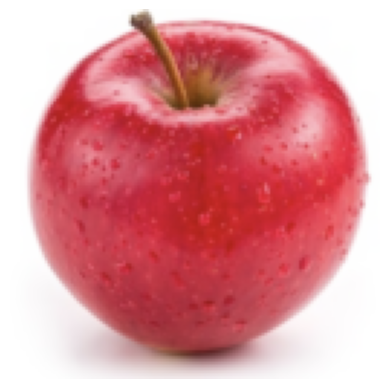

In [48]:
import numpy as np

image = plt.imread(df.iloc[0]['image_path'])
if image.shape[0] != 128 or image.shape[1] != 128:
	from skimage.transform import resize
	image = resize(image, (128, 128), anti_aliasing=True)

plt.imshow(image)
plt.axis('off')
plt.show()

In [49]:
import os
base_path="data"
limit=500

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
import os

total_resized = 0
total_skipped = 0

for index, row in df.iterrows():
    file_path = row['image_path']

    try:
        image = plt.imread(file_path)

    except Exception as e:
        print(f"Warning: Could not read file, skipping. Error: {e}")
        total_skipped += 1
        continue # Move to the next file

    if image.shape[0] != 128 or image.shape[1] != 128:

        image_resized = resize(image, (128, 128), anti_aliasing=True)
        image_resized = np.clip(image_resized, 0, 1) # Ensure valid [0, 1] range

        # Get extension for saving
        ext = os.path.splitext(file_path)[1].lower()

        try:
            if ext == '.png':
                plt.imsave(file_path, image_resized, format='png')
            elif ext in ['.jpg', '.jpeg']:
                plt.imsave(file_path, image_resized, format='jpeg')
            else:
                print(f"Unsupported save extension: {ext} for {file_path}")
                continue

            total_resized += 1
            if total_resized % 50 == 0: # Print status update
                 print(f"Resized {total_resized} images so far...")

        except Exception as e:
            print(f"Error saving resized image {file_path}, skipping. Error: {e}")
            total_skipped += 1

print(f"✅ Done. Total Resized: {total_resized}, Total Skipped (due to errors): {total_skipped}.")

Resized 50 images so far...
Resized 100 images so far...
Resized 150 images so far...
Resized 200 images so far...
Resized 250 images so far...
Resized 300 images so far...
Resized 350 images so far...
Resized 400 images so far...
Resized 450 images so far...
Resized 500 images so far...
Resized 550 images so far...
Resized 600 images so far...
Resized 650 images so far...
Resized 700 images so far...
Resized 750 images so far...
Resized 800 images so far...
Resized 850 images so far...
Resized 900 images so far...
Resized 950 images so far...
Resized 1000 images so far...
Resized 1050 images so far...
Resized 1100 images so far...
Resized 1150 images so far...
Resized 1200 images so far...
Resized 1250 images so far...
Resized 1300 images so far...
Resized 1350 images so far...
Resized 1400 images so far...
Resized 1450 images so far...
Resized 1500 images so far...
Resized 1550 images so far...
Resized 1600 images so far...
Resized 1650 images so far...
Resized 1700 images so far...


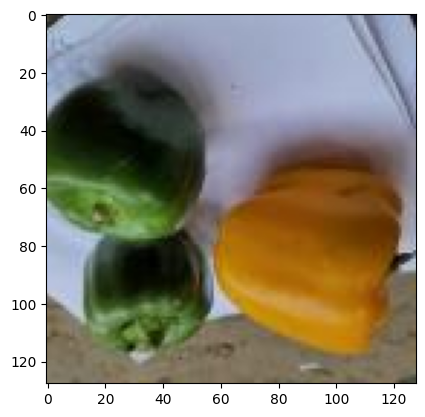

In [53]:
image = plt.imread(df.iloc[1500]['image_path'])
plt.imshow(image)

In [ ]:
import os
import PIL
from PIL import Image
root_data_dir = 'data/'
bad_files = []
total_files = 0

print(f"Scanning all images in: {root_data_dir}")

for dirname, _, filenames in os.walk(root_data_dir):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            total_files += 1
            file_path = os.path.join(dirname, filename)

            try:
                img = Image.open(file_path)
                img.verify()
            except Exception as e:
                print(f"CORRUPTED FILE DETECTED: {file_path}")
                print(f"   Error: {e}")
                bad_files.append(file_path)

print("-" * 30)
print(f"Scan complete. Checked {total_files} files.")

if not bad_files:
    print("No corrupted image files found.")
else:
    print(f"Found {len(bad_files)} corrupted files:")
    for f in bad_files:
        print(f"   - {f}")

Scanning all images in: data/
------------------------------
Scan complete. Checked 12520 files.
✅ No corrupted image files found.
